In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("cars-dataset.csv")
df.drop(columns="car name", inplace=True)
df.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg
208,8,318.0,150,3940,13.2,76,13.0
251,8,302.0,139,3570,12.8,78,20.2
254,6,200.0,85,2965,15.8,78,20.2
289,8,350.0,155,4360,14.9,79,16.9
6,8,454.0,220,4354,9.0,70,14.0
328,4,146.0,67,3250,21.8,80,30.0
86,8,304.0,150,3672,11.5,73,14.0
84,4,97.0,88,2100,16.5,72,27.0
330,4,85.0,?,1835,17.3,80,40.9
224,8,302.0,130,4295,14.9,77,15.0


In [2]:
df.loc[df["hp"]=="?"].head()

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,?,2046,19.0,71,25.0
126,6,200.0,?,2875,17.0,74,21.0
330,4,85.0,?,1835,17.3,80,40.9
336,4,140.0,?,2905,14.3,80,23.6
354,4,100.0,?,2320,15.8,81,34.5


In [3]:
df["hp"].replace(to_replace="?", value=0, inplace=True)

In [4]:
df["hp"].values

array(['130', '165', '150', '150', '140', '198', '220', '215', '225',
       '190', '170', '160', '150', '225', '95', '95', '97', '85', '88',
       '46', '87', '90', '95', '113', '90', '215', '200', '210', '193',
       '88', '90', '95', 0, '100', '105', '100', '88', '100', '165',
       '175', '153', '150', '180', '170', '175', '110', '72', '100', '88',
       '86', '90', '70', '76', '65', '69', '60', '70', '95', '80', '54',
       '90', '86', '165', '175', '150', '153', '150', '208', '155', '160',
       '190', '97', '150', '130', '140', '150', '112', '76', '87', '69',
       '86', '92', '97', '80', '88', '175', '150', '145', '137', '150',
       '198', '150', '158', '150', '215', '225', '175', '105', '100',
       '100', '88', '95', '46', '150', '167', '170', '180', '100', '88',
       '72', '94', '90', '85', '107', '90', '145', '230', '49', '75',
       '91', '112', '150', '110', '122', '180', '95', 0, '100', '100',
       '67', '80', '65', '75', '100', '110', '105', '140', '150',

In [5]:
from sklearn.preprocessing import LabelEncoder
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null int8
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), int8(1)
memory usage: 19.1 KB


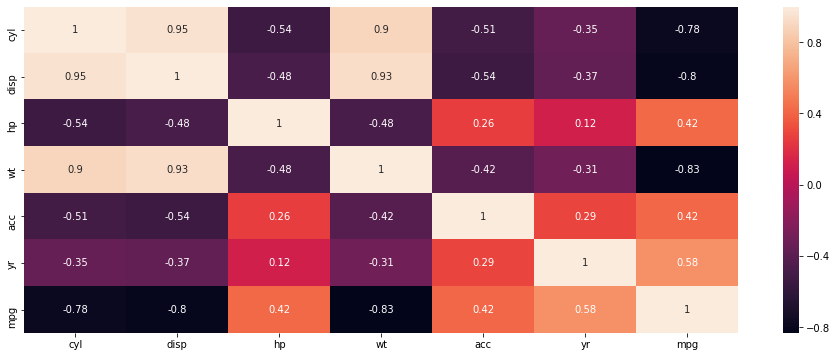

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)

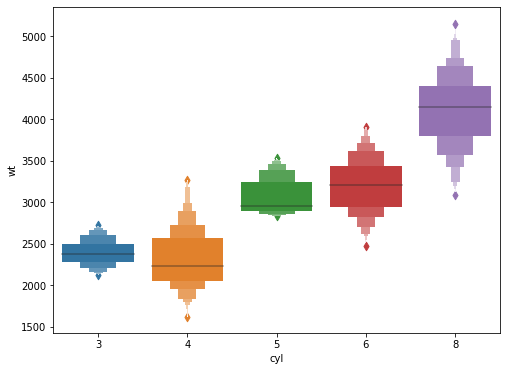

In [0]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x="cyl", y='wt', data=df)

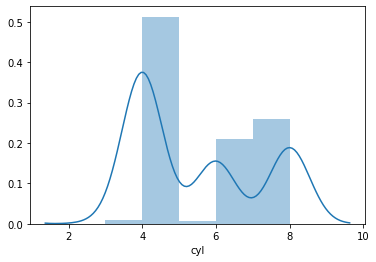

In [0]:
sns.distplot(df["cyl"])

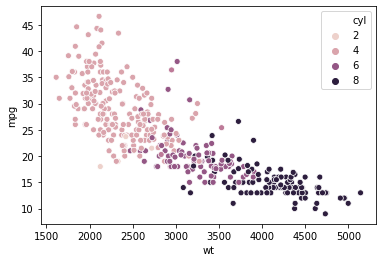

In [0]:
sns.scatterplot(x="wt", y="mpg", hue="cyl", data=df)

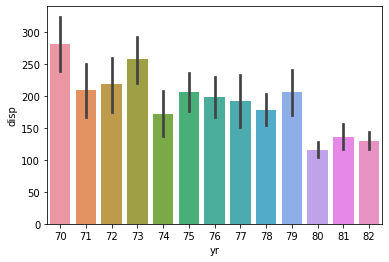

In [0]:
sns.barplot(y="disp", x="yr", data=df)

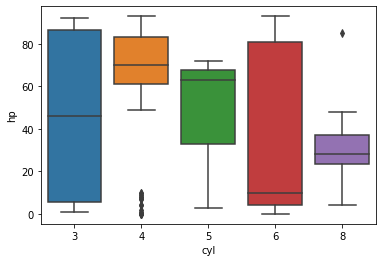

In [0]:
sns.boxplot(x="cyl", y="hp", data=df)

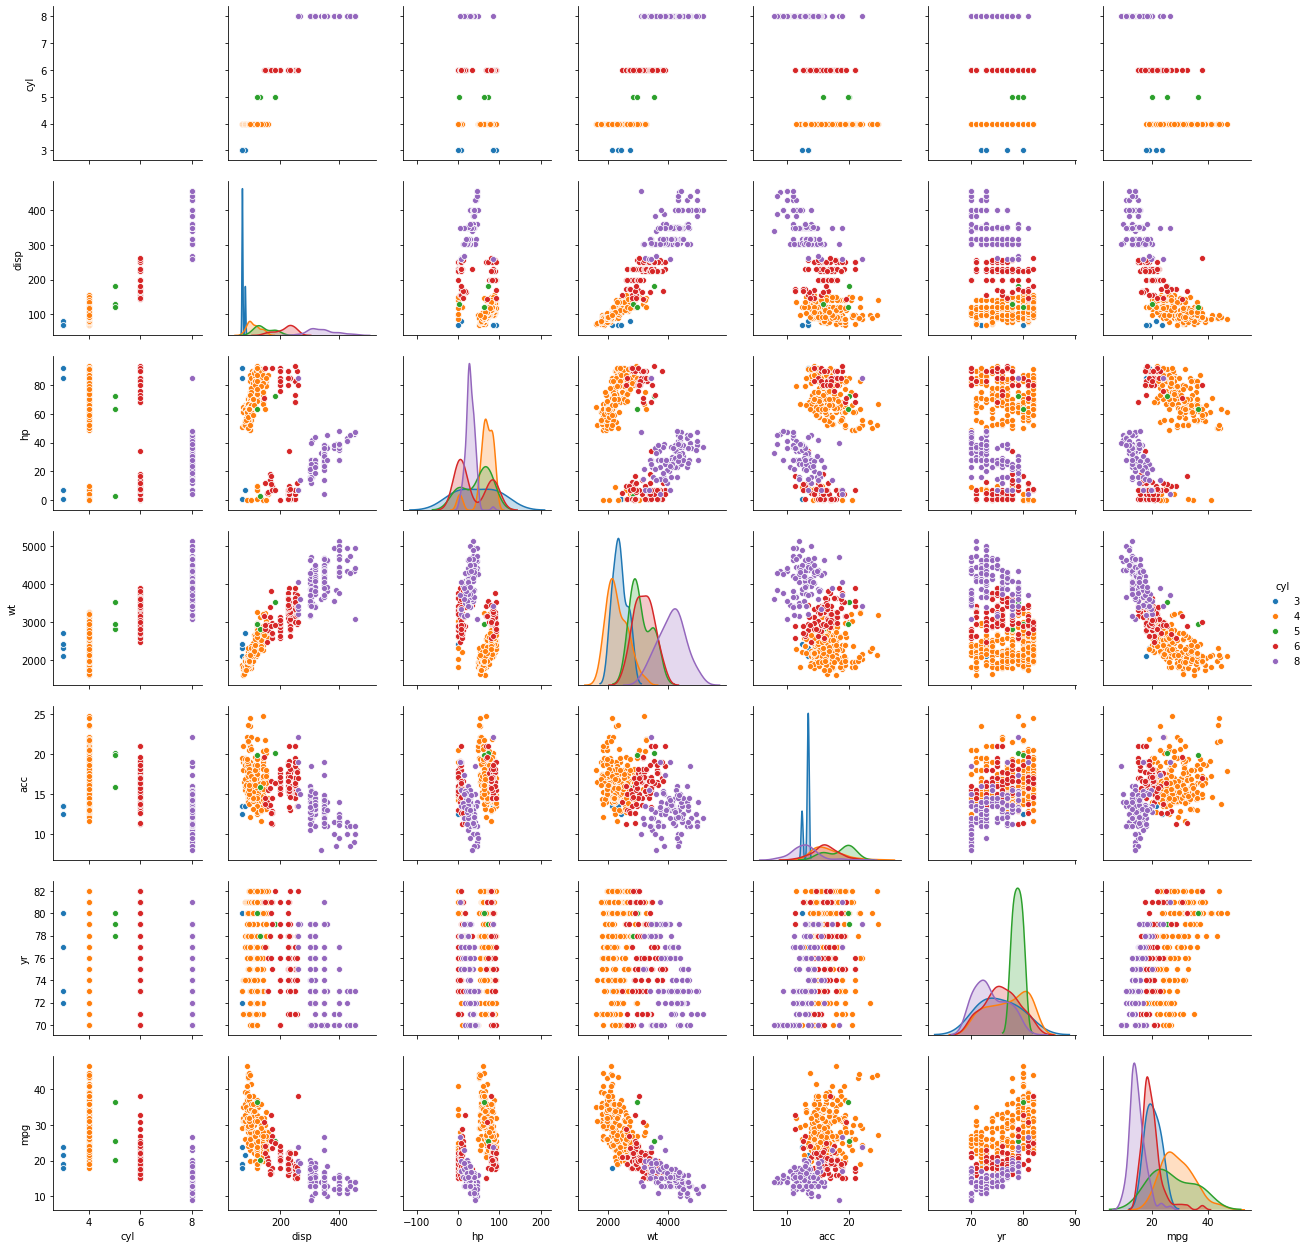

In [0]:
sns.pairplot(data=df, hue="cyl")

## Scaling the Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
X = pd.DataFrame(data_scaled, columns=df.columns)
X.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,-1.150351,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,-0.548239,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,-0.748943,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,-0.748943,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,-0.916196,0.565841,-1.840117,-1.627426,-0.834543


## Applying K Means Algorithem

In [31]:
from sklearn.cluster import KMeans
cluster_range = range( 2, 10)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                    
  centroids = clusters.cluster_centers_         
  cluster_errors.append( clusters.inertia_ )    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1365.572871
1,3,1083.670278
2,4,841.888287
3,5,733.094753
4,6,669.829671
5,7,610.935763
6,8,555.980320
7,9,518.079213


## Elbow graph to find Optimum No. of Clusters

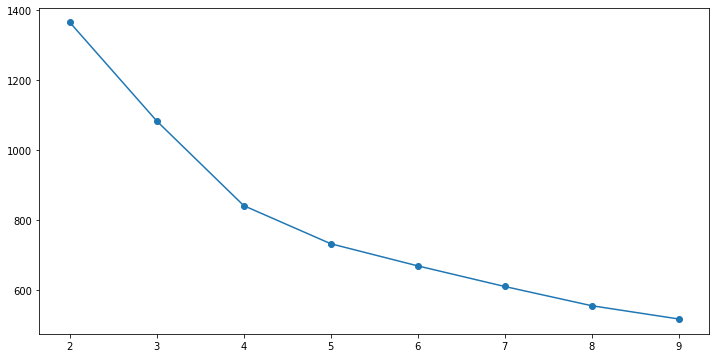

In [32]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids)

Centroid values
[[ 0.15389227  0.09946253 -1.47762587  0.22438306  0.02777704  0.06314496
  -0.38998726]
 [-0.53936706 -0.52718351  0.93760182 -0.50650504  0.46962368 -0.50957381
   0.03076135]
 [-0.8298058  -0.80464993  0.57040129 -0.82317943  0.40802859  1.06333864
   1.22677722]
 [ 1.49819126  1.49621235 -0.66322543  1.39614231 -1.06554838 -0.65711646
  -1.15533638]]


In [34]:
centroids_df= pd.DataFrame(centroids, columns=list(X))
centroids_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,0.153892,0.099463,-1.477626,0.224383,0.027777,0.063145,-0.389987
1,-0.539367,-0.527184,0.937602,-0.506505,0.469624,-0.509574,0.030761
2,-0.829806,-0.804650,0.570401,-0.823179,0.408029,1.063339,1.226777
3,1.498191,1.496212,-0.663225,1.396142,-1.065548,-0.657116,-1.155336


In [35]:
X['labels'] = kmeans.labels_
X.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,
0,74,74,74,74,74,74,74
1,117,117,117,117,117,117,117
2,111,111,111,111,111,111,111
3,96,96,96,96,96,96,96


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdab81c1e80>,
      dtype=object)

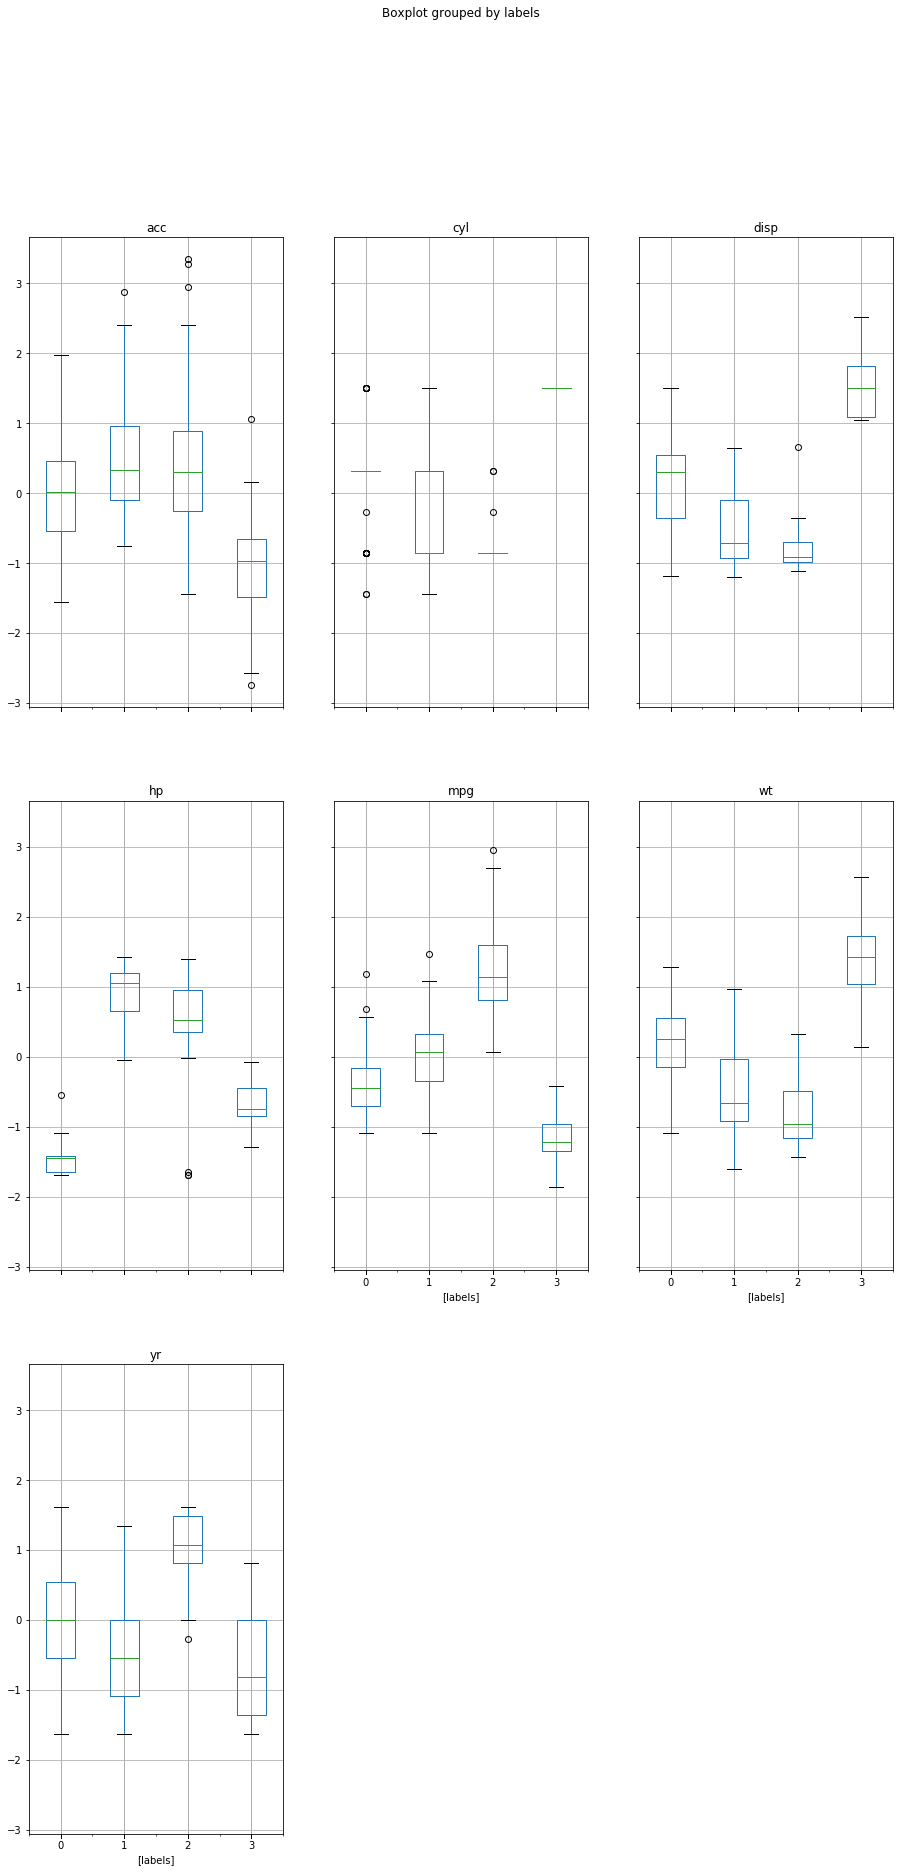

In [36]:
import matplotlib.pylab as plt
X.boxplot(by = 'labels',  layout=(4,3), figsize=(15, 40))

## Handling the Outlier

In [0]:
data = X
def replace(group):
    median, std = group.median(), group.std()
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()       
    return group
data_corrected = (data.groupby('labels').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(X['labels']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdabbdc8eb8>,
      dtype=object)

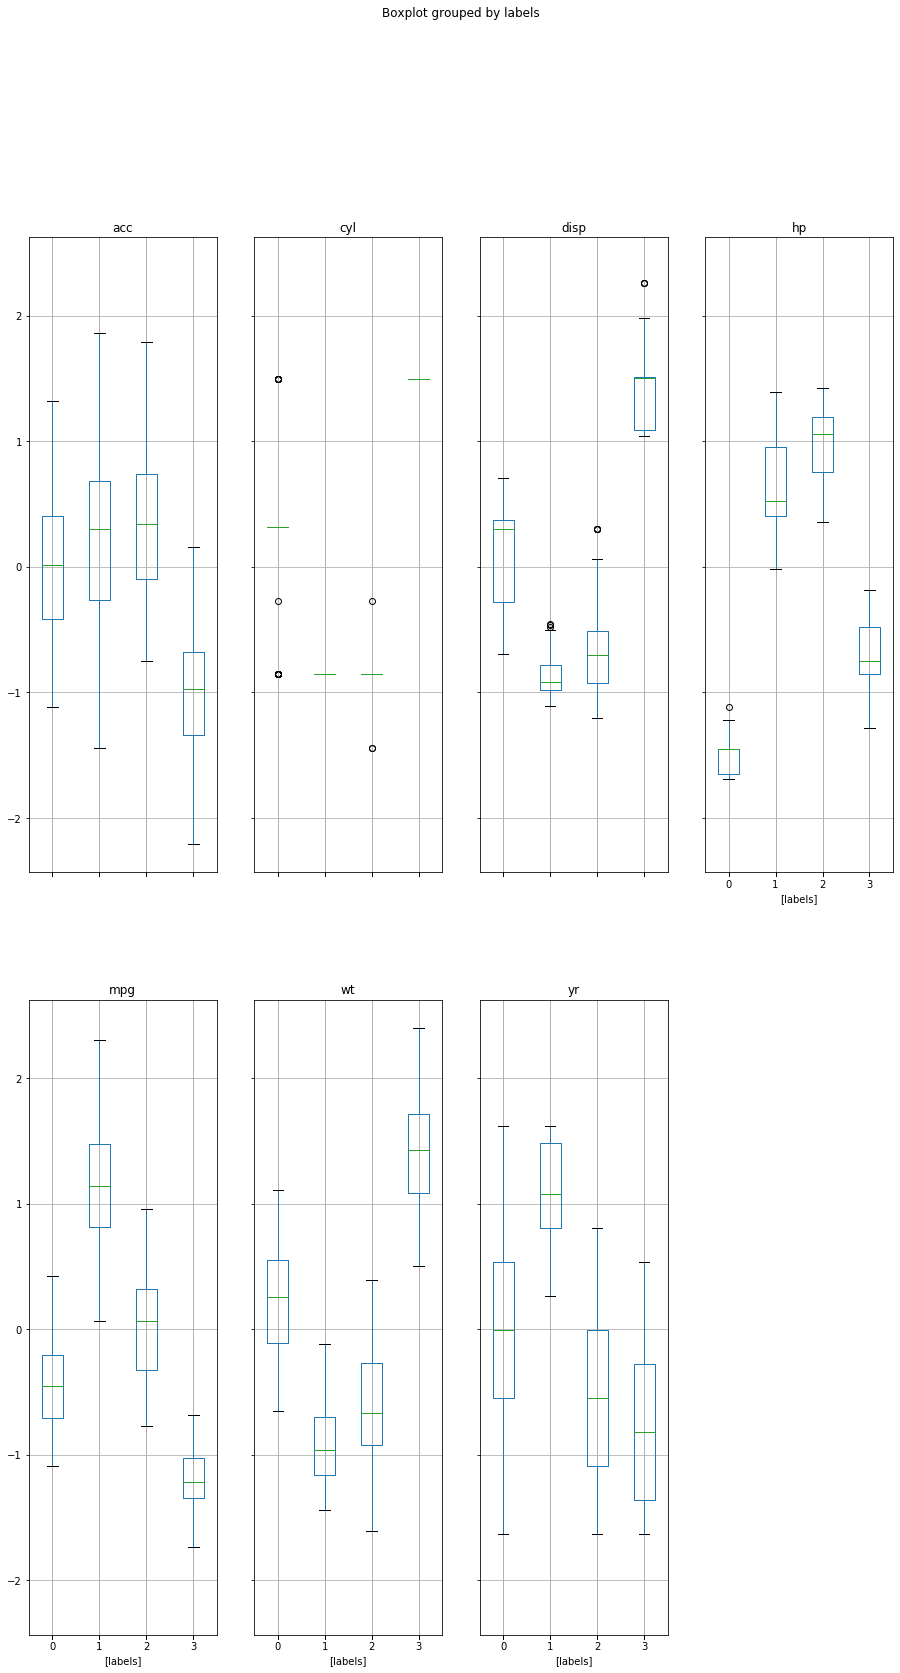

In [17]:
concat_data.boxplot(by = 'labels', layout=(3,4), figsize=(15, 40))

In [44]:
Data1=X[X.labels==0]
X1=Data1.drop(columns="mpg")
Y1=Data1["mpg"]
Data2=X[X.labels==1]
X2=Data2.drop(columns="mpg")
Y2=Data2["mpg"]
Data3=X[X.labels==2]
X3=Data2.drop(columns="mpg")
Y3=Data2["mpg"]
Data4=X[X.labels==3]
X4=Data4.drop(columns="mpg")
Y4=Data4["mpg"]
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
print(Y1.shape)
print(Y2.shape)
print(Y3.shape)
print(Y4.shape)

(74, 7)
(117, 7)
(117, 7)
(96, 7)
(74,)
(117,)
(117,)
(96,)


## Training the model

In [45]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X1, Y1)
model_2 = LinearRegression()
model_2.fit(X2, Y2)
model_3 = LinearRegression()
model_3.fit(X3, Y3)
model_4 = LinearRegression()
model_4.fit(X4, Y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Extracting the coefficient

In [47]:
print(model_1.coef_)
print(model_2.coef_)
print(model_3.coef_)
print(model_4.coef_)

[-0.00662729  0.13742756 -0.06948589 -0.57667868 -0.06301865  0.28689914
  0.        ]
[ 0.34235588 -0.63363822 -0.24092233 -0.38795537 -0.05284573  0.10275018
  0.        ]
[ 0.34235588 -0.63363822 -0.24092233 -0.38795537 -0.05284573  0.10275018
  0.        ]
[ 0.         -0.07448864 -0.22543344 -0.12001672 -0.17770666  0.18539609
  0.        ]
